In [1]:
cd D:/

D:\


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from cycler import cycler



In [5]:
data=pd.read_csv("heart.csv")
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [6]:
data.head(5)
#output=target

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
data.describe(include="all")

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [9]:
data.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [11]:
# Also check the unique values in each column

dict={}

for i in list(data.columns):
    dict[i]=data[i].value_counts().shape[0]
    
pd.DataFrame(dict,index=["unique count"]).transpose()    

,unique count
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
restecg,3
thalachh,91
exng,2
oldpeak,40


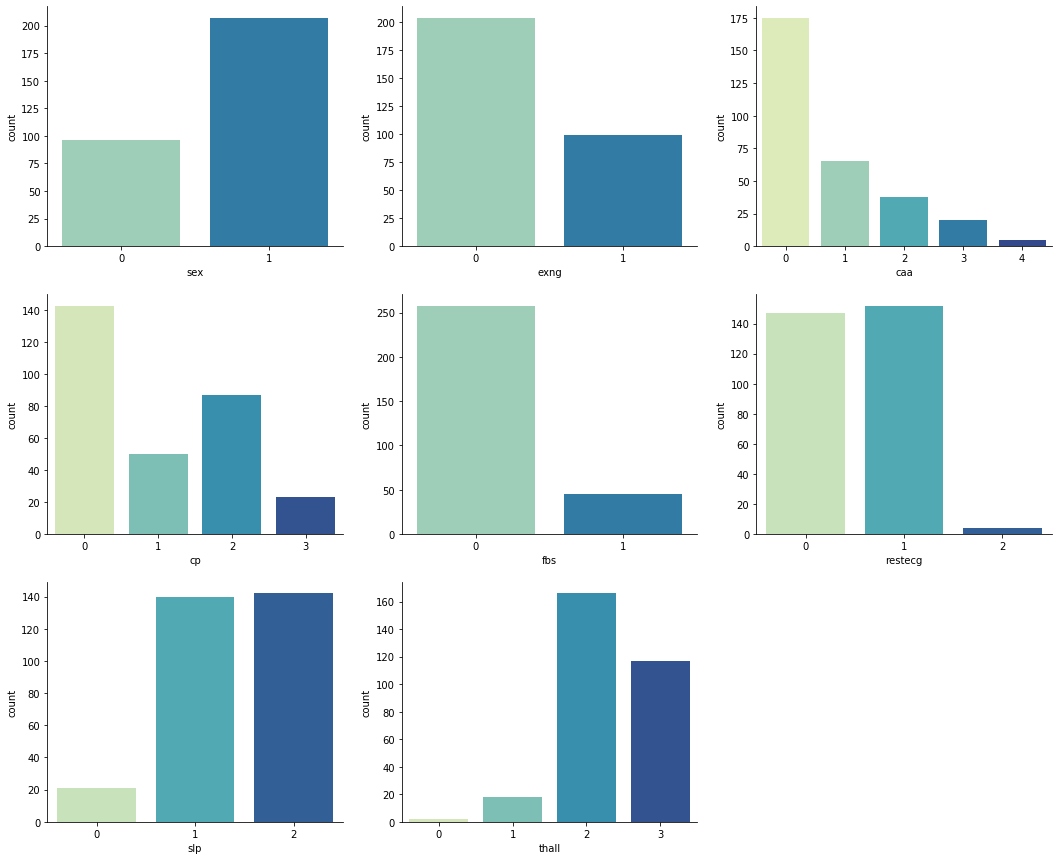

In [15]:
# seperate categorical and contonuous

fig=plt.figure(figsize=(18,15))
gs=fig.add_gridspec(3,3)

ax0=fig.add_subplot(gs[0,0])
ax1=fig.add_subplot(gs[0,1])
ax2=fig.add_subplot(gs[0,2])
ax3=fig.add_subplot(gs[1,0])
ax4=fig.add_subplot(gs[1,1])
ax5=fig.add_subplot(gs[1,2])
ax6=fig.add_subplot(gs[2,0])
ax7=fig.add_subplot(gs[2,1])


ax_sex=ax0
sns.countplot(x="sex",data=data,ax=ax_sex,palette='YlGnBu')

sns.despine()


ax_exng=ax1
sns.countplot(x="exng",data=data,ax=ax_exng,palette='YlGnBu')

sns.despine()

ax_caa=ax2
sns.countplot(x="caa",data=data,ax=ax_caa,palette='YlGnBu')

sns.despine()

ax_cp=ax3
sns.countplot(x="cp",data=data,ax=ax_cp,palette='YlGnBu')

sns.despine()

ax_fbs=ax4
sns.countplot(x="fbs",data=data,ax=ax_fbs,palette='YlGnBu')

sns.despine()

ax_restecg=ax5
sns.countplot(x="restecg",data=data,ax=ax_restecg,palette='YlGnBu')

sns.despine()

ax_slp=ax6
sns.countplot(x="slp",data=data,ax=ax_slp,palette='YlGnBu')

sns.despine()

ax_thall=ax7
sns.countplot(x="thall",data=data,ax=ax_thall,palette='YlGnBu')

sns.despine()

plt.show()



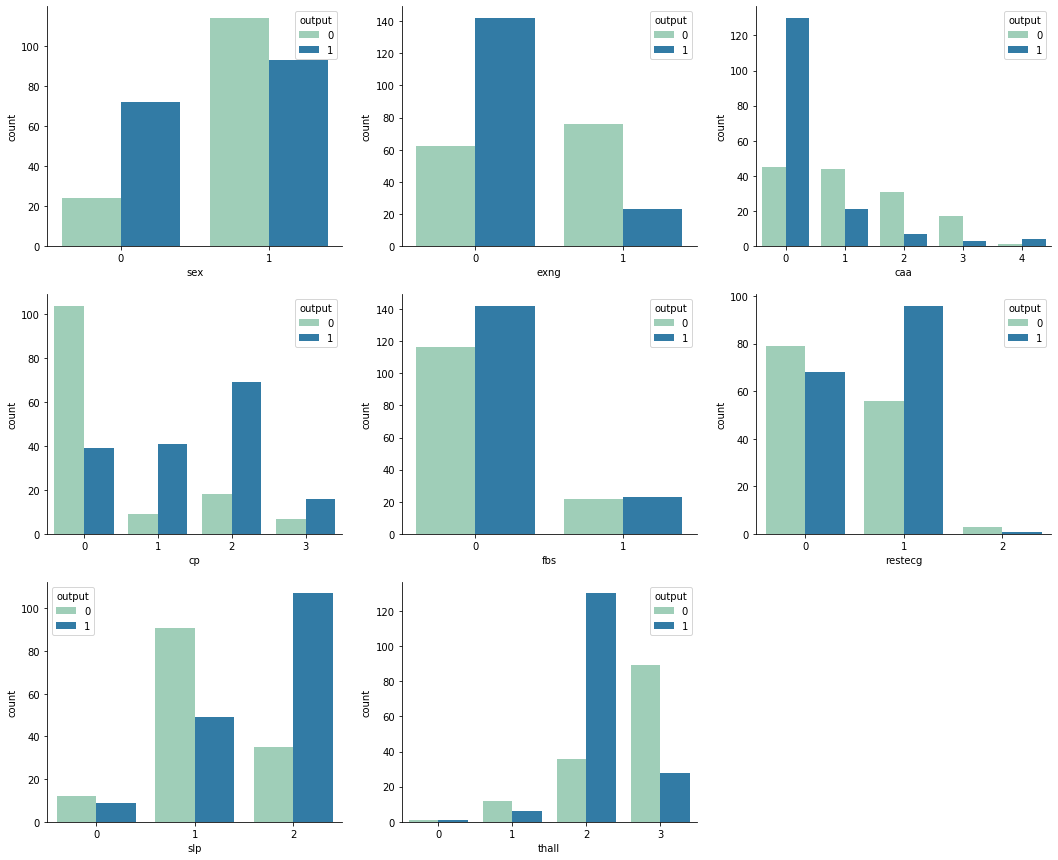

In [16]:
# categorical features and target feature

fig=plt.figure(figsize=(18,15))

gs=fig.add_gridspec(3,3)

ax0=fig.add_subplot(gs[0,0])
ax1=fig.add_subplot(gs[0,1])
ax2=fig.add_subplot(gs[0,2])
ax3=fig.add_subplot(gs[1,0])
ax4=fig.add_subplot(gs[1,1])
ax5=fig.add_subplot(gs[1,2])
ax6=fig.add_subplot(gs[2,0])
ax7=fig.add_subplot(gs[2,1])


ax_sex=ax0
sns.countplot(x="sex",hue="output",data=data,ax=ax_sex,palette='YlGnBu')

sns.despine()


ax_exng=ax1
sns.countplot(x="exng",hue="output",data=data,ax=ax_exng,palette='YlGnBu')

sns.despine()

ax_caa=ax2
sns.countplot(x="caa",hue="output",data=data,ax=ax_caa,palette='YlGnBu')

sns.despine()

ax_cp=ax3
sns.countplot(x="cp",hue="output",data=data,ax=ax_cp,palette='YlGnBu')

sns.despine()

ax_fbs=ax4
sns.countplot(x="fbs",hue="output",data=data,ax=ax_fbs,palette='YlGnBu')

sns.despine()

ax_restecg=ax5
sns.countplot(x="restecg",hue="output",data=data,ax=ax_restecg,palette='YlGnBu')

sns.despine()

ax_slp=ax6
sns.countplot(x="slp",hue="output",data=data,ax=ax_slp,palette='YlGnBu')

sns.despine()

ax_thall=ax7
sns.countplot(x="thall",hue="output",data=data,ax=ax_thall,palette='YlGnBu')

sns.despine()

plt.show()


In [17]:
print('1)',data.groupby(["sex","output"])["output"].count())
print('')
print('')

print('2)',data.groupby(["exng","output"])["output"].count())
print('')
print('')

print('3)',data.groupby(["caa","output"])["output"].count())
print('')
print('')

print('4)',data.groupby(["cp","output"])["output"].count())
print('')
print('')

print('5)',data.groupby(["fbs","output"])["output"].count())
print('')
print('')

print('6)',data.groupby(["restecg","output"])["output"].count())
print('')
print('')

print('7)',data.groupby(["slp","output"])["output"].count())
print('')
print('')

print('8)',data.groupby(["thall","output"])["output"].count())


1) sex  output
0    0          24
     1          72
1    0         114
     1          93
Name: output, dtype: int64


2) exng  output
0     0          62
      1         142
1     0          76
      1          23
Name: output, dtype: int64


3) caa  output
0    0          45
     1         130
1    0          44
     1          21
2    0          31
     1           7
3    0          17
     1           3
4    0           1
     1           4
Name: output, dtype: int64


4) cp  output
0   0         104
    1          39
1   0           9
    1          41
2   0          18
    1          69
3   0           7
    1          16
Name: output, dtype: int64


5) fbs  output
0    0         116
     1         142
1    0          22
     1          23
Name: output, dtype: int64


6) restecg  output
0        0         79
         1         68
1        0         56
         1         96
2        0          3
         1          1
Name: output, dtype: int64


7) slp  output
0    0          12


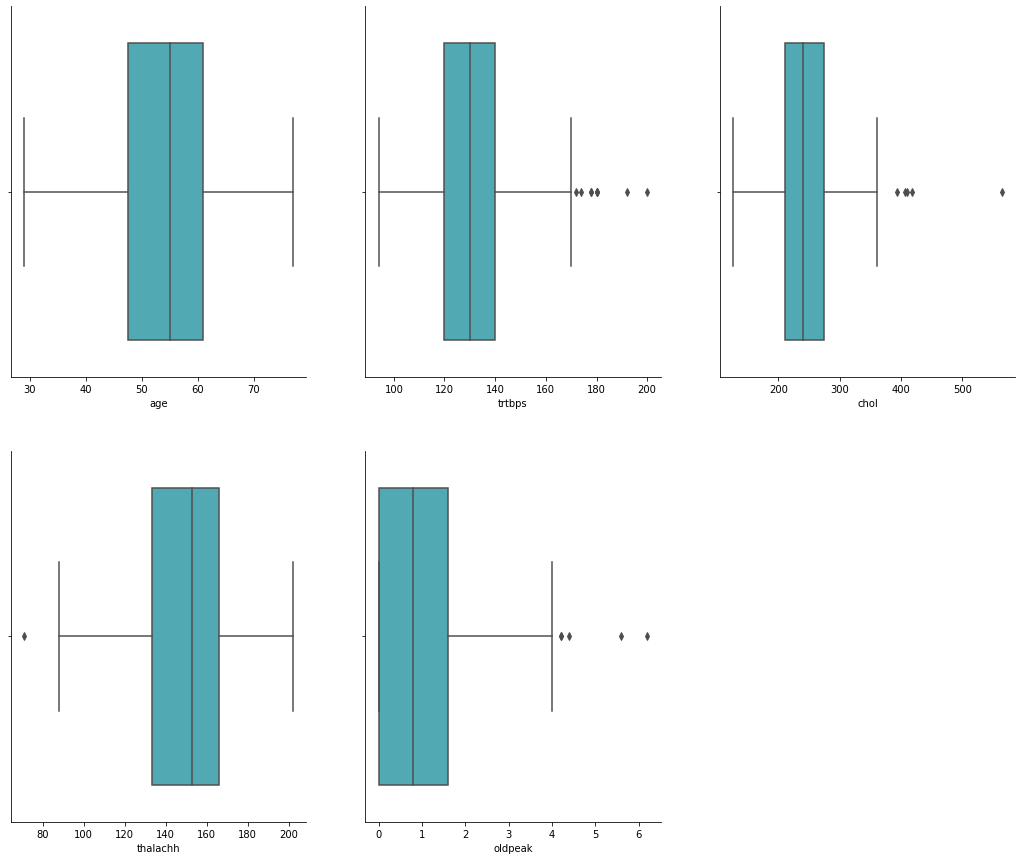

In [36]:
# CHECK OUTLIERS

fig=plt.figure(figsize=(18,15))
gs=fig.add_gridspec(2,3)

ax0=fig.add_subplot(gs[0,0])
ax1=fig.add_subplot(gs[0,1])
ax2=fig.add_subplot(gs[0,2])
ax3=fig.add_subplot(gs[1,0])
ax4=fig.add_subplot(gs[1,1])


ax_age=ax0
sns.boxplot(x="age",data=data,ax=ax_age,palette='YlGnBu')
sns.despine()

ax_trtbps=ax1
sns.boxplot(x="trtbps",data=data,ax=ax_trtbps,palette='YlGnBu')
sns.despine()

ax_chol=ax2
sns.boxplot(x="chol",data=data,ax=ax_chol,palette='YlGnBu')
sns.despine()

ax_thalachh=ax3
sns.boxplot(x="thalachh",data=data,ax=ax_thalachh,palette='YlGnBu')
sns.despine()

ax_oldpeak=ax4
sns.boxplot(x="oldpeak",data=data,ax=ax_oldpeak,palette='YlGnBu')
sns.despine()


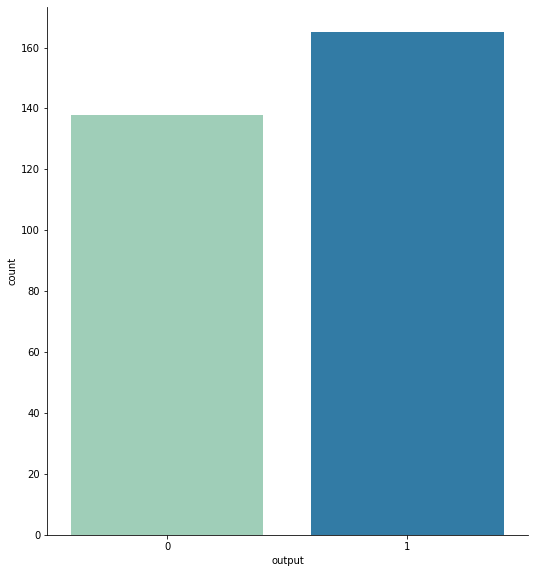

In [39]:
# target feature
fig=plt.figure(figsize=(18,15))
gs=fig.add_gridspec(3,4)
ax_target=fig.add_subplot(gs[:2,:2])
sns.countplot(x="output",data=data,ax=ax_target,palette="YlGnBu")
sns.despine()

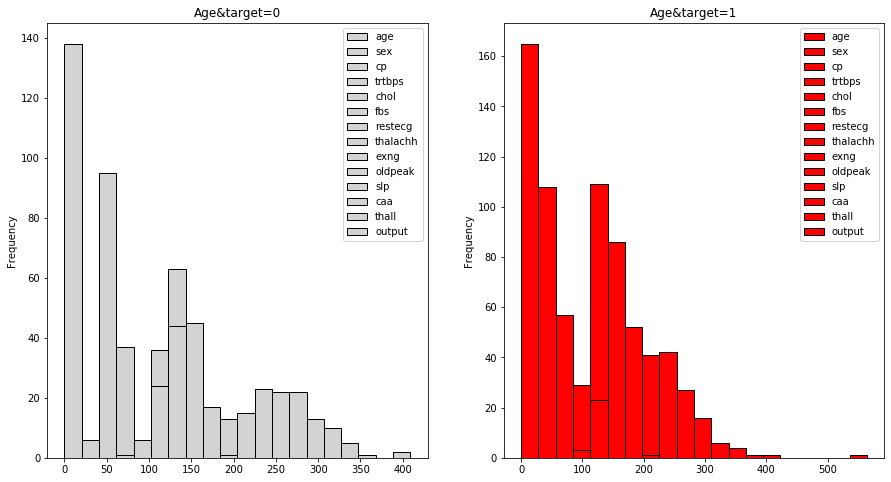

In [42]:
f,ax=plt.subplots(1,2,figsize=(15,8))

data.loc[data["output"]==0].plot.hist(ax=ax[0],bins=20,edgecolor="black",color="lightgray")
ax[0].set_title("Age&target=0")

data.loc[data["output"]==1].plot.hist(ax=ax[1],bins=20,edgecolor="black",color="red")
ax[1].set_title("Age&target=1")

plt.show()

In [43]:
# correlation between features

data.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


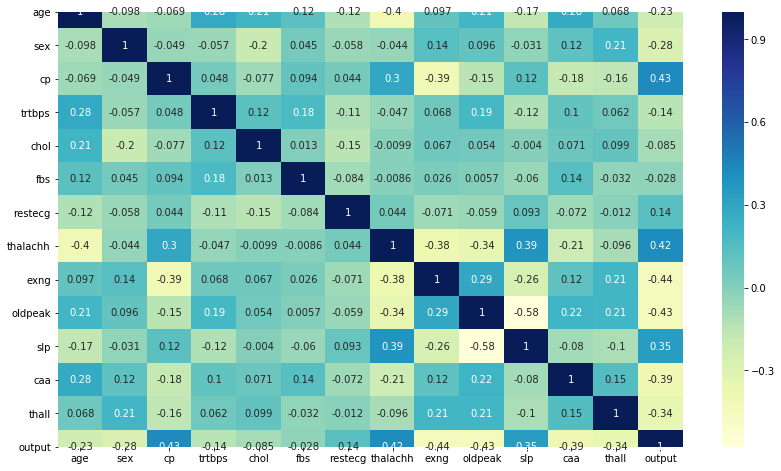

In [44]:
fig=plt.figure(figsize=(14,8))
sns.heatmap(data.corr(),annot=True,cmap="YlGnBu")
plt.show()

In [45]:
# Feature engineering and data cleaning.divide the columns in to categorical feature and continuous feature

cat_columns=["sex","exng","caa","cp","fbs","restecg","slp","thall"]
con_columns=["age","trtbps","chol","thalachh","oldpeak"]
target_column=["output"]


In [46]:
# categorical feature

data=pd.get_dummies(data=data,columns=cat_columns)
data.columns

Index(['age', 'trtbps', 'chol', 'thalachh', 'oldpeak', 'output', 'sex_0',
       'sex_1', 'exng_0', 'exng_1', 'caa_0', 'caa_1', 'caa_2', 'caa_3',
       'caa_4', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'slp_0', 'slp_1', 'slp_2', 'thall_0',
       'thall_1', 'thall_2', 'thall_3'],
      dtype='object')

In [48]:
"""# detect outlier
 def outliers_iqr(data):
     q1,q3=np.percentile(data,[25,75])
     iqr=q3-q1
     lower_bound=q1-(iqr*1.5)
     upper_bound=q3+(iqr*1.5)
     
     
     return.np.where((data>upper_bound)|(data<lower_bound))
     
# delete 'trtbps','chol','thalachh','oldpeak'
trtbps_outlier=outlier_iqr(data['trtbps'])[0]
chol_outlier=outlier_iqr(data['chol'])[0]
thalachh_outlier=outlier_iqr(data['thalachh'])[0]
oldpeak_outlier=outlier_iqr(data['oldpeak'])[0]"""

"# detect outlier\n def outliers_iqr(data):\n     q1,q3=np.percentile(data,[25,75])\n     iqr=q3-q1\n     lower_bound=q1-(iqr*1.5)\n     upper_bound=q3+(iqr*1.5)\n     \n     \n     return.np.where((data>upper_bound)|(data<lower_bound))\n     \n# delete 'trtbps','chol','thalachh','oldpeak'\ntrtbps_outlier=outlier_iqr(data['trtbps'])[0]\nchol_outlier=outlier_iqr(data['chol'])[0]\nthalachh_outlier=outlier_iqr(data['thalachh'])[0]\noldpeak_outlier=outlier_iqr(data['oldpeak'])[0]"

In [49]:
"""data.loc[trtbps_outlier,'trtbps']"""

"data.loc[trtbps_outlier,'trtbps']"

In [50]:
"""data.loc[chol_outlier,'chol']"""

"data.loc[chol_outlier,'chol']"

In [51]:
"""data.loc[thalachh_outlier,'thalachh']"""

"data.loc[thalachh_outlier,'thalachh']"

In [52]:
"""data.loc[oldpeak_outlier,'oldpeak']"""

"data.loc[oldpeak_outlier,'oldpeak']"

In [53]:
"""# concatenate all thr array
lead_outlier_index=np.concatenate((trtbps_outlier,chol_outlier,thalachh_outlier,oldpeak_outlier),axis=None)
print(len(lead_outlier_index))
lead_outlier_index"""

'# concatenate all thr array\nlead_outlier_index=np.concatenate((trtbps_outlier,chol_outlier,thalachh_outlier,oldpeak_outlier),axis=None)\nprint(len(lead_outlier_index))\nlead_outlier_index'

In [54]:
"""#put into 'lead_not__outlier_index' which is not the outliers data 
lead_not_outlier_index=[]

for i in data.index:
   if i not in lead_outlier_index:
     lead_not_outlier_index.append(i)"""

"#put into 'lead_not__outlier_index' which is not the outliers data \nlead_not_outlier_index=[]\n\nfor i in data.index:\n   if i not in lead_outlier_index:\n     lead_not_outlier_index.append(i)"

In [55]:
"""data=data.loc[lead_not_outlier_index]
data=data.reset_index(drop=True)
data.columns"""

'data=data.loc[lead_not_outlier_index]\ndata=data.reset_index(drop=True)\ndata.columns'

In [57]:
#standard scalar to do feature engineering

from sklearn.preprocessing import RobustScaler

scaler=RobustScaler()

data[con_columns]=scaler.fit_transform(data[con_columns])

data[con_columns]

,age,trtbps,chol,thalachh,oldpeak
0,0.592593,0.75,-0.110236,-0.092308,0.9375
1,-1.333333,0.00,0.157480,1.046154,1.6875
2,-1.037037,0.00,-0.566929,0.584615,0.3750
3,0.074074,-0.50,-0.062992,0.769231,0.0000
4,0.148148,-0.50,1.795276,0.307692,-0.1250
...,...,...,...,...,...
298,0.148148,0.50,0.015748,-0.923077,-0.3750
299,-0.740741,-1.00,0.377953,-0.646154,0.2500
300,0.962963,0.70,-0.740157,-0.369231,1.6250
301,0.148148,0.00,-1.716535,-1.169231,0.2500


In [58]:
data.head()

,age,trtbps,chol,thalachh,oldpeak,output,sex_0,sex_1,exng_0,exng_1,...,restecg_0,restecg_1,restecg_2,slp_0,slp_1,slp_2,thall_0,thall_1,thall_2,thall_3
0,0.592593,0.75,-0.110236,-0.092308,0.9375,1,0,1,1,0,...,1,0,0,1,0,0,0,1,0,0
1,-1.333333,0.00,0.157480,1.046154,1.6875,1,0,1,1,0,...,0,1,0,1,0,0,0,0,1,0
2,-1.037037,0.00,-0.566929,0.584615,0.3750,1,1,0,1,0,...,1,0,0,0,0,1,0,0,1,0
3,0.074074,-0.50,-0.062992,0.769231,0.0000,1,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
4,0.148148,-0.50,1.795276,0.307692,-0.1250,1,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0


In [59]:
data["output"].value_counts

<bound method IndexOpsMixin.value_counts of 0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: int64>

In [60]:
x=data.drop("output",axis=1)
y=data["output"].values

In [61]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=52,shuffle=True)

In [70]:
# predictive modeling

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier


from sklearn.metrics import f1_score

In [65]:
# logistic regression
lr=LogisticRegression()

lr.fit(x_train,y_train)

y_pred=lr.predict(x_test)

print(f"Logistic Regression F1 Score:{f1_score(y_test,y_pred,average='micro')}")


Logistic Regression F1 Score:0.9354838709677419


In [67]:
# support vector machine

svc=SVC(probability=True)

svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)

print(f"Support Vector Machine F1 Score:{f1_score(y_test,y_pred,average='micro')}")

Support Vector Machine F1 Score:0.9032258064516129


In [68]:
# Random forest

rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print(f"Random Forest F1 Score:{f1_score(y_test,y_pred,average='micro')}")

Random Forest F1 Score:0.9032258064516129


In [72]:
# KNeighbour Classifier

knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print(f"KNeighbor Classifier F1 Score:{f1_score(y_test,y_pred,average='micro')}")

KNeighbor Classifier F1 Score:0.9032258064516129
